In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as mx
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


# In this tutorial we will implement single layer and multi-layer neural nets, and an auroencoder
## Learning Outcomes: 
1) Apply single- and multilayer FNNs in a binary classification setting using the popular python library sklearn https://scikit-learn.org/stable/
2) Visualise the important variables of the single-layer FNN 
3) Explore different metrics to evaluate the model performance in regression settings
4) Explore the effect of changing the network architecture, model parameters and scaling on the model performance and training times
5) Apply AE (autoencoder) for data reduction and using the output for a classification model 

## Data

In this tuorial we will use some plasma metabolomics data to predict T2-Diabietes occurrence

In [2]:
df = pd.read_csv('.../Data/diabetes_metabolomics_plasma.csv' ) #  can change this to the previous xlsx format  below 
#  pd.read_excel('../Data/diabetes_metabolomics_plasma.xlsx'), add or remove the index_col argument if necissary 

In [3]:
df.head() ### 

,AGE,GENDER,BMI,ETH,T2D,sample_id,"1,11-Undecanedicarboxylic acid","1,2-dipalmitoylglycerol","1,2-propanediol","1,3,7-trimethylurate",...,tyrosine,undecanoate (11:0),urate,urea,uridine,valine,xanthine,xylitol,xylonate,xylose
1,34.505133,0,25.010211,2,0,QMDiab-ID222,4.015998,4.822787,5.098491,4.430118,...,6.844272,4.885885,5.824023,7.577408,5.290736,7.239540,4.254777,4.052859,4.387091,4.676128
2,47.066393,1,28.367759,3,0,QMDiab-ID113,4.165116,4.991613,5.064084,4.585177,...,6.755005,4.777224,5.990350,7.465627,5.220019,7.348071,4.183861,4.341484,4.460427,4.585401
3,55.490760,1,29.705644,1,0,QMDiab-ID29,3.928917,4.965361,5.185007,4.006547,...,6.971284,4.737634,5.892525,7.433326,5.188568,7.356957,4.350213,4.101610,4.726884,4.785554
4,56.334018,1,23.140496,2,0,QMDiab-ID243,4.272476,4.819821,5.015473,4.564346,...,6.943175,4.736576,5.832160,7.422004,5.037060,7.260422,4.037787,4.111296,4.488342,4.696762
5,35.630390,1,30.062295,1,0,QMDiab-ID270,3.914247,4.900546,5.264884,3.719528,...,7.068370,4.754971,6.013982,7.786201,5.388167,7.377851,4.211793,4.099279,4.545646,4.630343


1    179
0    177
Name: T2D, dtype: int64


<AxesSubplot:>

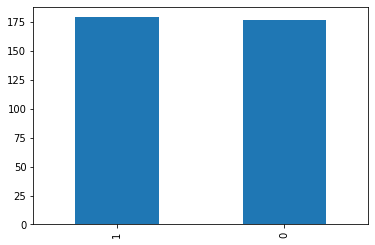

In [4]:
print(df['T2D'].value_counts())
df['T2D'].value_counts().plot(kind='bar')

In python column indices start from 0, we want to subset only the metabolomics colulmns for feature scaling. 
AS you see the data is fairly ballanced, something to think about is how do our metrics change when there is a class imbalance 

In [5]:
# Create feature matrix and target vector
X = df.iloc[:,6:]
y = df['T2D']

In order to test our alogrithms we need to set aside some of the data we have. This is practice for machine learning models. We will use 80% of our data to train our model, and the remaining 20% will be used to test the performance of our model. 

Scikit-Learn has a function train_test_split to easily do this for us.

In [6]:
# Import train-test split
from sklearn.model_selection import train_test_split

# Split the df into 80% train 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42) #### if you want you can change the number '42 to your birthday and it will change the results slightly'

It is crucial that all of the data it is comparing is on the same scale. In our Proteaomics data, most of the data is continuous. We will scale the data using the StandardScaler() shown in the previous tutorials. 

When scaling your data you want to fit the model to your training data, and only transform your testing data. 

In [7]:
# Normalize Data
from sklearn.preprocessing import StandardScaler

# Instantiate scaler model
scaler = StandardScaler()

# Fit and Transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test
X_test_scaled = scaler.transform(X_test)

In [8]:
## Baseline Accuracy

When evaluating model performance we want to start with a baseline accuracy. This is the accuracy score if we were to simply guess the majority outcome everytime. It gives us a starting point to compare our models to. The baseline metric is the best we can do without models. Hopefully, our models can improve over the baseline.

In [9]:
# Calculate the baseline accuracy

# Find the majority count
y_train.value_counts()# Calculate the baseline accuracy



0    143
1    141
Name: T2D, dtype: int64

In [10]:
#  Counts for y_test
y_test.value_counts()

1    38
0    34
Name: T2D, dtype: int64

In [11]:
# If we were to guess the majority (0) for each test, we would get 42 correct
# baseline is correct guesses divided by total guesses 
baseline = 38 / (38 + 34)

In [12]:
38 / (38 + 34)

0.5277777777777778

### T2 Diabetes classification using  MLPClassifier from Sklearn 

In [13]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier 


In [14]:
#Initializing the MLPClassifier (this one is just a single lauer of 100 neurons )
classifier = MLPClassifier(hidden_layer_sizes=(100), max_iter=300,activation = 'relu',solver='adam',random_state=42) ### single layer of 100 neruons 

In [15]:
#Fitting the training data to the network
classifier.fit(X_train_scaled, y_train)

#Using the trained network to predict

#Predicting y for X_val
y_pred = classifier.predict(X_test_scaled)

Investigate how the coeficents at each layer change-- have a think about why the shape changes 

In [16]:
classifier.coefs_[1].shape  ### Change here the number from try 1 and 0 and look at the shape difference 

(100, 1)

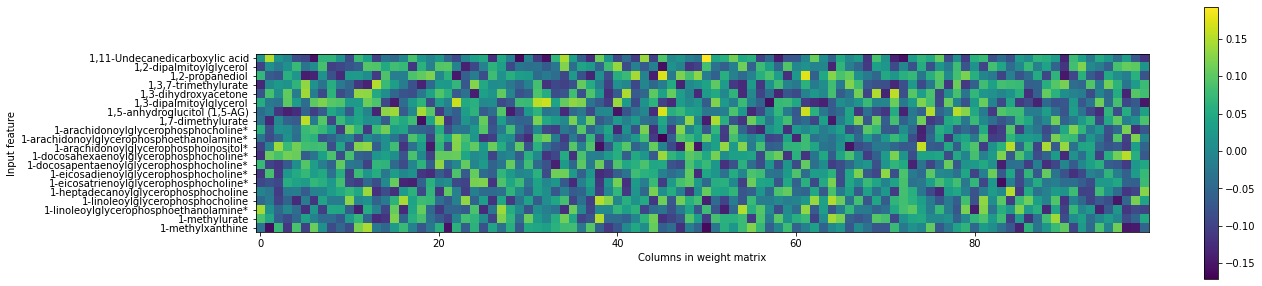

In [17]:
plt.figure(figsize=(20,5))
plt.imshow(classifier.coefs_[0][0:20], interpolation='none', cmap='viridis')
plt.yticks(range(20), np.array(X.columns)[0:20])
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

## Interpretation of Figure

- Shows weights learned connecting the input to the first hidden layer
- Rows in the plot correspond to the 20 input features
- Columns in plot correspond to the 100 hidden units


- Feature that have very small weights for all hidden units are 'less important' to model
- Could also visualize weight connecting the hidden layers to the output layer, but that is even harder to interpret

### Metrics 


In [18]:
## Accuracy is one perfomrance metric here we will define several alternative metrics 

def modelPerformance(confMat):
    TN = confMat[0, 0]
    TP = confMat[1, 1]
    FP = confMat[0, 1]
    FN = confMat[1, 0]
    prec = TP / (TP + FP)
    rec = TP / (TP + FN)
    spec = TN / (TN + FP)
    fpr = FP / (TN + FP)
    f1 = 2 * (prec * rec) / (prec + rec)
    acc = (TP + TN) / (TP + FP + TN + FN)
    return (acc, prec, rec, spec, fpr, f1)

def printPerformance(confMat):
    acc, prec, rec, spec, fpr, f1 = modelPerformance(confMat)
    print("Accuracy = " "%.4f" % acc)
    print("Precision = " "%.4f" % prec)
    print("Recall = " "%.4f" % rec)
    print("Specificity = " "%.4f" % spec)
    print("False positive rate = " "%.4f" % fpr)
    print("F1-score = " "%.4f" % f1)
    np.set_printoptions(precision=2)
    print("Confusion matrix (%):")
    print(confMat/np.sum(confMat)*100)

In [19]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_pred)
printPerformance(cmat)

Accuracy = 0.8194
Precision = 0.8378
Recall = 0.8158
Specificity = 0.8235
False positive rate = 0.1765
F1-score = 0.8267
Confusion matrix (%):
[[38.89  8.33]
 [ 9.72 43.06]]


Here we are achieving an accuracy of 0.82, lets see if we can improve upon this with more layers

In [20]:
classifier = MLPClassifier(hidden_layer_sizes=(100,200), max_iter=300,activation = 'relu',solver='adam',random_state=42) ###  layer of 100 and 200 neruons 
#Fitting the training data to the network
classifier.fit(X_train_scaled, y_train)

#Using the trained network to predict

#Predicting y for X_val
y_pred = classifier.predict(X_test_scaled)

In [21]:
from sklearn.metrics import confusion_matrix
#Confusion matrix and metrics
cmat = confusion_matrix(y_test, y_pred)
printPerformance(cmat)

Accuracy = 0.8333
Precision = 0.8611
Recall = 0.8158
Specificity = 0.8529
False positive rate = 0.1471
F1-score = 0.8378
Confusion matrix (%):
[[40.28  6.94]
 [ 9.72 43.06]]


Here we are achieving an accuracy of 0.83, lets see if we can improve upon this with 10-fold CV and some hyperparmaters tuning. We can use the GridSearchCV fucntion to help with this.

In [22]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['adam'], 'max_iter': [300,500,700], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':[(50,100),(100,200),(50, 100,200), (100,200,300)] , 'random_state':[42], 'activation':['relu']}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [23]:
parameters

{'solver': ['adam'],
 'max_iter': [300, 500, 700],
 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
        1.e-09]),
 'hidden_layer_sizes': [(50, 100),
  (100, 200),
  (50, 100, 200),
  (100, 200, 300)],
 'random_state': [42],
 'activation': ['relu']}

In [24]:
### this may take 2-5 minutes to run depending on your hardware
clf.fit(X_train_scaled, y_train)

/home/kl2418/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': [(50, 100), (100, 200),
                                                (50, 100, 200),
                                                (100, 200, 300)],
                         'max_iter': [300, 500, 700], 'random_state': [42],
                         'solver': ['adam']})

In [25]:
print(clf.best_params_)

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 200), 'max_iter': 300, 'random_state': 42, 'solver': 'adam'}


In [26]:
#Predicting y for X_val
y_pred = clf.predict(X_test_scaled)

In [27]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_pred)
printPerformance(cmat)

Accuracy = 0.8472
Precision = 0.8649
Recall = 0.8421
Specificity = 0.8529
False positive rate = 0.1471
F1-score = 0.8533
Confusion matrix (%):
[[40.28  6.94]
 [ 8.33 44.44]]


Great we can achieve a resonable test Accuracy. Now try  in the cel below some of your own hyperparameters in the gridsearch setting and see if you can achieve a higher performance. 
This documentation will help https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [28]:
### Try irt yourself here with parameters of your choice 
parameters = {'solver': ['adam'], 'max_iter': [123,456,789], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':[(1,2),(3,4)] , 'random_state':[42], 'activation':['relu']}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
### this may take 2-5 minutes to run depending on your hardware and no. hyperperamters
clf.fit(X_train_scaled, y_train)
#Predicting y for X_val
y_pred = clf.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_pred)
printPerformance(cmat)

Accuracy = 0.7917
Precision = 0.8286
Recall = 0.7632
Specificity = 0.8235
False positive rate = 0.1765
F1-score = 0.7945
Confusion matrix (%):
[[38.89  8.33]
 [12.5  40.28]]


Now that we have understood how to implement FNNS, we now implement another common nerual network- Autoencoders! 

# Autoencoders

In [29]:
# We will make an simple autoencoder from the MLPRegressor function in sklearn
from sklearn.neural_network import MLPRegressor

In [30]:
# Shape of latent variable and hidden layers


# Encoder structure
n_encoder1 = 300
n_encoder2 = 500

n_latent = 50

# Decoder structure
n_decoder2 = 300
n_decoder1 = 500



In [31]:
# We will make an simple autoencoder from the MLPRegressor function in sklearn
reg = MLPRegressor(hidden_layer_sizes = (n_encoder1, n_encoder2, n_latent, n_decoder2, n_decoder1), 
                   activation = 'tanh', 
                   solver = 'adam', 
                   learning_rate_init = 0.001, 
                   max_iter = 100, # This is where we define the no.itterations/epochs in sklearn
                   tol = 0.000001, 
                   verbose = False)



In [32]:
# fit the model with trainin data  as input an dX as output 
# This may take 5 minutes depending on your hardware, if training takes too long decrease max_iter in the above cell
# It may not converge but for this tutorial that will be fine 
reg.fit(X_train_scaled, X_train_scaled)

/home/kl2418/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(300, 500, 50, 300, 500),
             max_iter=100, tol=1e-06)

In [34]:
# Encoder helper function, no need to change this 

def encoder(data):
    data = np.asmatrix(data)
    
    encoder1 = data*reg.coefs_[0] + reg.intercepts_[0]
    encoder1 = (np.exp(encoder1) - np.exp(-encoder1))/(np.exp(encoder1) + np.exp(-encoder1))
    
    encoder2 = encoder1*reg.coefs_[1] + reg.intercepts_[1]
    encoder2 = (np.exp(encoder2) - np.exp(-encoder2))/(np.exp(encoder2) + np.exp(-encoder2))
    
    latent = encoder2*reg.coefs_[2] + reg.intercepts_[2]
    latent = (np.exp(latent) - np.exp(-latent))/(np.exp(latent) + np.exp(-latent))
    
    return np.asarray(latent)



# Examine the Latent Space of the Autoencoder

In [35]:
# Extract latent embeddings with trained encoder part of autoencoder
test_latent = encoder(X_test_scaled)
train_latent = encoder(X_train_scaled)

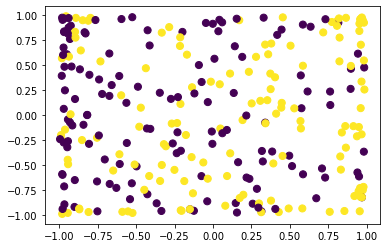

In [36]:
plt.scatter(train_latent[:,0], train_latent[:,1], c=y_train, s=50, cmap='viridis')
plt.show()

Like in previous tutorials we can also examine this latent space with PCA compnents

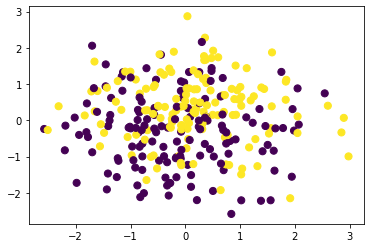

In [37]:
from sklearn.decomposition import PCA, SparsePCA, KernelPCA
pca = PCA(n_components=4)
pca_latent = pca.fit_transform(train_latent)
# run PCA with 4 components
# plot a scatterplot using seaborn
# the x axis will contain the first column of the pca scores x=pca_covid[:, 0]
plt.scatter(pca_latent[:, 0], pca_latent[:, 1], c=y_train, s=50, cmap='viridis')
plt.show()

You can also use SparsePCA, KernelPCA, UMAP etc. 

### We will now train an FFNN on this autoencoder generated latent space to predict T2 Diabetes

In [38]:
parameters = {'solver': ['adam'], 'max_iter': [300,500,700], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':[(50,100),(100,200),(50, 100,200), (100,200,300)] , 'random_state':[42], 'activation':['relu']}
clf_lat = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [39]:
### this may take 2-5 minutes to run depending on your hardware
clf_lat.fit(train_latent, y_train)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': [(50, 100), (100, 200),
                                                (50, 100, 200),
                                                (100, 200, 300)],
                         'max_iter': [300, 500, 700], 'random_state': [42],
                         'solver': ['adam']})

In [37]:
#Predicting y for X_val
y_pred = clf_lat.predict(test_latent)
cmat = confusion_matrix(y_test, y_pred)
printPerformance(cmat)

Accuracy = 0.8472
Precision = 0.8649
Recall = 0.8421
Specificity = 0.8529
False positive rate = 0.1471
F1-score = 0.8533
Confusion matrix (%):
[[40.28  6.94]
 [ 8.33 44.44]]


We can see that it is not performing as well as some of our previous models, however we have not tuned the hyperparamaters of this model. This can take a few hours to train an autoencoder to get a good performance. In an ideal setting we would itterate over various paramters however for today you can try change the dimensions of the latent space and see if you can get an improvement. 

### We can also use PCA etc. for dimensionality reduction and build models on the PCA components

In [40]:
pca = PCA(n_components=50)
train_components = pca.fit_transform(X_train_scaled)
test_components = pca.transform(X_test_scaled)


In [41]:
parameters = {'solver': ['adam'], 'max_iter': [300,500,700], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':[(50,100),(100,200),(50, 100,200), (100,200,300)] , 'random_state':[42], 'activation':['relu']}
clf_pca= GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

### this may take 2-5 minutes to run depending on your hardware
clf_pca.fit(train_components, y_train)


#Predicting y for test data 
y_pred = clf_pca.predict(test_components)
cmat = confusion_matrix(y_test, y_pred)
printPerformance(cmat)

Accuracy = 0.8194
Precision = 0.8205
Recall = 0.8421
Specificity = 0.7941
False positive rate = 0.2059
F1-score = 0.8312
Confusion matrix (%):
[[37.5   9.72]
 [ 8.33 44.44]]


Although the autoencoder did not perform the best (depsite being a neuralnet), perhaps with further hyperparamter tuning and training it would.

Considering the baseline test accuracy was 54%, our nerual networks have shown an improvement with and accuracy of 84%

# What's Next?
We have walked through how to implement MLPClassifiers, MLPRegression (autoencoder) 
- Its important to note the MLPClassifier and MLPRegression only capture a small amount of what is possible with deep learning 
For further understanding and practice:
- Try using a different scaling for instance: robust_scale / RobustScaler, power_transform / PowerTransformer
- Change certain paramaters like latent space dimensions/ ncomponents in PCA 
- Use a different dataset for a regression problem
- Try run a GridSearchCV on the Autoencoder model (note this will increase training time!)
